In [ ]:
# zone wise model(14 models) was trained
# average accuracy 65%

import os
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
warnings.filterwarnings("ignore")

data_dir = data_dir = "E:\\He_is_enough03 X UniqoXTech X Dreams\\Click_here\\Artificial Intelligence\\ML - AGRIQO\\Data set\\Agriqo(slider1) - Sheet1.csv"

data = pd.read_csv(data_dir)

col = ['Unnamed: 9','Unnamed: 10','Unnamed: 11','Unnamed: 12']
data.drop(columns=col, axis=1, inplace=True)

target_per_class = 50

import numpy as np

augmented_data = []

numeric_cols = ['rainfall (mm)', 'temperature(avg)', 'humidity(avg)','sunlight(hour)', 'direction of wind(deg)', 'velocity of wind(km/h)']

grouped = data.groupby('label')

for label, group in grouped:
    n_existing = len(group)
    n_to_generate = max(0, target_per_class - n_existing)

    for _ in range(n_to_generate):
        row = group.sample(n=1, replace=True).iloc[0].copy()

        for col in numeric_cols:
            std_dev = group[col].std()
            if np.isnan(std_dev):
                std_dev = 1  # fallback
            noise = np.random.normal(0, std_dev * 0.1)
            row[col] += noise

        augmented_data.append(row)

augmented_df = pd.DataFrame(augmented_data)
augmented_df.to_csv('dekhina.csv',index=False)

print(f"Added {len(augmented_df)} augmented rows.")
data = pd.concat([data, augmented_df], ignore_index=True)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['label_encoded'] = label_encoder.fit_transform(data['label'])
data.drop(columns=['label'], axis=1, inplace=True)

label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print(label_mapping)

print(data.head())

# data['temp_month_product'] = data['temperature(avg)'] * data['month(chara)']
# data['hum_month_product'] = data['humidity(avg)']*data['month(chara)']
# data['sunlight_month'] = data['sunlight(hour)']*data['month(chara)']
# data.drop(columns=['temperature(avg)','month(chara)','humidity(avg)','sunlight(hour)'], axis=1, inplace=True)

Added 1677 augmented rows.
{'Aman': 0, 'Aush': 1, 'Badam Kharip - 1': 2, 'Badam robi': 3, 'Banana': 4, 'Boro': 5, 'Brinjal(Khorip)': 6, 'Brinjal(Robi)': 7, 'Corn(Robi)': 8, 'Guava': 9, 'Kharif cucumber': 10, 'Khorip Mug 1': 11, 'Mango': 12, 'Potato': 13, 'Rabi Cucumber': 14, 'Red Lentil': 15, 'Robi Mug': 16, 'Soybean': 17, 'Sugarcane': 18, 'Tomato': 19, 'Tula': 20, 'Wheat': 21, 'corn khorip-1': 22, 'garlic': 23, 'indian jujube': 24, 'jackfruit': 25, 'jute': 26, 'khorip green chilli': 27, 'khorip lau (grourd)': 28, 'khorip onion': 29, 'khorip pointed grourd': 30, 'khorip pumpkin Cucurbita': 31, 'licchi': 32, 'masterd seed': 33, 'papaya': 34, 'pineapple': 35, 'robi green chilli ': 36, 'robi lau (gourd)': 37, 'robi onion': 38, 'robi pointed gourd': 39, 'robi pumpkin Cucurbita': 40}
  Agricultural zone  month(chara)  rainfall (mm)  temperature(avg)  \
0           Barisal          7.50          111.7              28.5   
1             Bogra          8.00           63.3              29.3   


In [51]:
zone_datasets= {}

for zone in data['Agricultural zone'].unique():
    zone_data = data[data['Agricultural zone'] == zone].copy()
    
    var_name = f"{zone}"
    
    zone_datasets[var_name] = zone_data

zone_datasets['Barisal']


Agricultural zone  month(chara)  rainfall (mm)  temperature(avg)  \
0              Barisal          7.50     111.700000         28.500000   
14             Barisal         10.00       9.000000         24.800000   
26             Barisal         12.00       1.700000         21.700000   
36             Barisal         11.25       9.000000         24.800000   
48             Barisal          2.00       4.000000         21.200000   
...                ...           ...            ...               ...   
2016           Barisal         10.50      39.705052         28.085649   
2018           Barisal         10.50      43.624823         28.076531   
2029           Barisal         10.50      42.445043         28.073619   
2040           Barisal         10.50      37.135394         28.058493   
2041           Barisal         10.50      36.144395         28.040894   

      humidity(avg)  sunlight(hour)  direction of wind(deg)  \
0         88.400000       23.300000              175.000000   
14        77.200000       49.000000              232.000000   
26        74.300000       48.700000              225.000000   
36        77.200000       49.000000              232.000000   
48        70.900000       52.300000              211.000000   
...             ...             ...                     ...   
2016      82.856628       43.525483              229.188669   
2018      82.840365       46.291618              227.048642   
2029      83.063735       44.886137              227.074218   
2040      82.915575       43.862257              225.675205   
2041      83.030046       45.470217              224.285362   

      velocity of wind(km/h)  label_encoded  
0                   6.500000              0  
14                  2.700000             15  
26                  3.100000             19  
36                  2.700000             21  
48                  4.600000              4  
...                      ...            ...  
2016                0.745801             40  
2018                1.070567             40  
2029                2.744665             40  
2040                3.258623             40  
2041                2.350166             40  

[145 rows x 9 columns]

In [52]:
for zone_name, df in zone_datasets.items():
    print(f"{zone_name}: {len(df)} rows")


Barisal: 145 rows
Bogra: 179 rows
Chittagonj: 133 rows
Cumilla: 123 rows
Dhaka: 187 rows
Dinajpur: 190 rows
Faridpur: 97 rows
Khulna: 104 rows
Jashore: 188 rows
Mymensingh: 198 rows
Rajshahi: 204 rows
Rangamati: 65 rows
Sylhet: 69 rows
Rangpur: 168 rows


In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn import metrics

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'HistGradientBoosting': HistGradientBoostingClassifier(),
    # 'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',objective='multi:softmax'),
    'KNN': KNeighborsClassifier(),
    'CatBoost': CatBoostClassifier(),
    'LightGBM': lgb.LGBMClassifier()
}

from collections import Counter
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average = 'micro')
    recall = recall_score(y_test, y_pred,average = 'micro')
    f1 = f1_score(y_test, y_pred,average = 'micro')
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(3, 3))
    plt.imshow(cm, interpolation='none', cmap='Blues')
    plt.colorbar(label="Count")

    num_classes = len(np.unique(y_test))
    ticks = np.linspace(0, num_classes - 1, num_classes)

    plt.xticks(ticks, labels=np.unique(y_test), fontsize=6, rotation=90)
    plt.yticks(ticks, labels=np.unique(y_test), fontsize=6)
    plt.xlabel("Predicted Labels", fontsize=10)
    plt.ylabel("True Labels", fontsize=10)
    plt.title("Confusion Matrix", fontsize=12)

    plt.grid(False)
    plt.tight_layout()
    plt.show()

    return accuracy, precision, recall, f1


--- Evaluation for Barisal ---

Model: Decision Tree


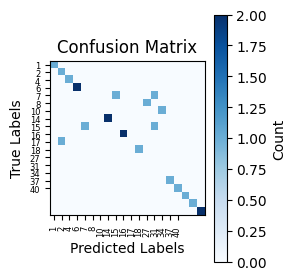

(0.6956521739130435, 0.6956521739130435, 0.6956521739130435, 0.6956521739130435)

Model: Random Forest


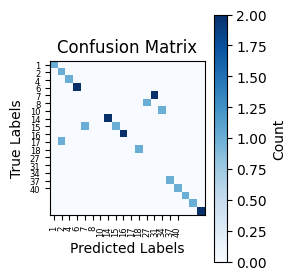

(0.7391304347826086, 0.7391304347826086, 0.7391304347826086, 0.7391304347826086)

Model: Gradient Boosting


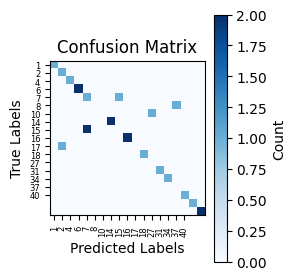

(0.7391304347826086, 0.7391304347826086, 0.7391304347826086, 0.7391304347826086)

Model: HistGradientBoosting


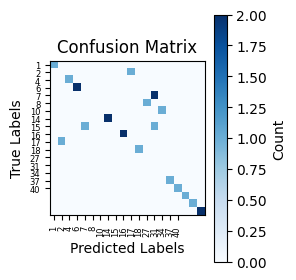

(0.6521739130434783, 0.6521739130434783, 0.6521739130434783, 0.6521739130434783)

Model: KNN


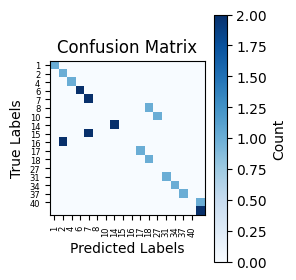

(0.6956521739130435, 0.6956521739130435, 0.6956521739130435, 0.6956521739130435)

Model: CatBoost
Learning rate set to 0.070061
0:	learn: 3.0565511	total: 206ms	remaining: 3m 26s
1:	learn: 2.9800552	total: 215ms	remaining: 1m 47s
2:	learn: 2.9105803	total: 224ms	remaining: 1m 14s
3:	learn: 2.8492078	total: 232ms	remaining: 57.8s
4:	learn: 2.7786840	total: 241ms	remaining: 47.9s
5:	learn: 2.7229510	total: 244ms	remaining: 40.4s
6:	learn: 2.6658483	total: 252ms	remaining: 35.8s
7:	learn: 2.6114207	total: 261ms	remaining: 32.4s
8:	learn: 2.5635530	total: 271ms	remaining: 29.8s
9:	learn: 2.5173469	total: 278ms	remaining: 27.5s
10:	learn: 2.4562127	total: 283ms	remaining: 25.4s
11:	learn: 2.4024661	total: 291ms	remaining: 23.9s
12:	learn: 2.3485931	total: 299ms	remaining: 22.7s
13:	learn: 2.3001306	total: 307ms	remaining: 21.6s
14:	learn: 2.2499806	total: 316ms	remaining: 20.7s
15:	learn: 2.1983086	total: 324ms	remaining: 19.9s
16:	learn: 2.1559669	total: 334ms	remaining: 19.3s
17:	learn: 2

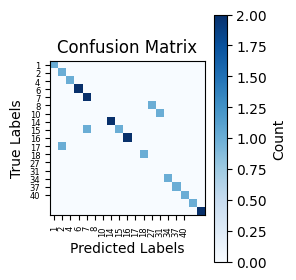

(0.8260869565217391, 0.8260869565217391, 0.8260869565217391, 0.8260869565217391)

Model: LightGBM
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002624 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 203
[LightGBM] [Info] Number of data points in the train set: 92, number of used features: 7
[LightGBM] [Info] Start training from score -2.912351
[LightGBM] [Info] Start training from score -2.123893
[LightGBM] [Info] Start training from score -2.912351
[LightGBM] [Info] Start training from score -4.521789
[LightGBM] [Info] Start training from score -2.575878
[LightGBM] [Info] Start training from score -3.135494
[LightGBM] [Info] Start training from score -3.135494
[LightGBM] [Info] Start training from score -4.521789
[LightGBM] [Info] Start training from score -3.135494
[LightGBM] [Info] Start training from score -3.828641
[LightGBM] [In

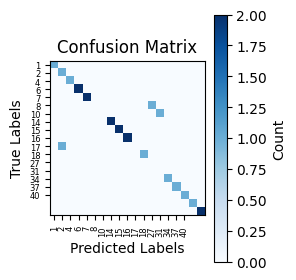

(0.8695652173913043, 0.8695652173913043, 0.8695652173913043, 0.8695652173913043)

--- Evaluation for Bogra ---

Model: Decision Tree


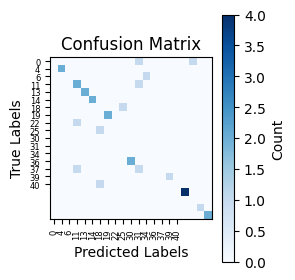

(0.6, 0.6, 0.6, 0.6)

Model: Random Forest


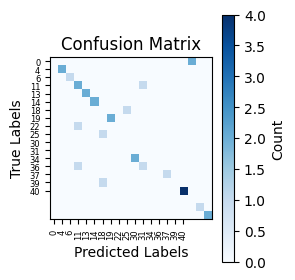

(0.6333333333333333, 0.6333333333333333, 0.6333333333333333, 0.6333333333333333)

Model: Gradient Boosting


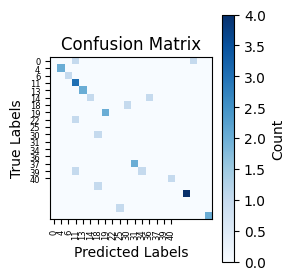

(0.6, 0.6, 0.6, 0.6)

Model: HistGradientBoosting


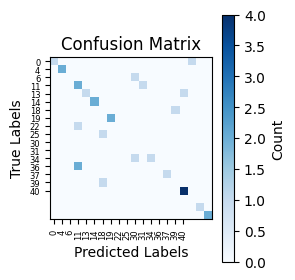

(0.6333333333333333, 0.6333333333333333, 0.6333333333333333, 0.6333333333333333)

Model: KNN


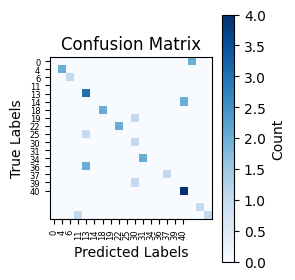

(0.6, 0.6, 0.6, 0.6)

Model: CatBoost
Learning rate set to 0.071017
0:	learn: 3.2445772	total: 20.2ms	remaining: 20.2s
1:	learn: 3.1702301	total: 40.6ms	remaining: 20.3s
2:	learn: 3.0944163	total: 70.7ms	remaining: 23.5s
3:	learn: 3.0306803	total: 90.7ms	remaining: 22.6s
4:	learn: 2.9659418	total: 106ms	remaining: 21.1s
5:	learn: 2.9042823	total: 124ms	remaining: 20.6s
6:	learn: 2.8376030	total: 141ms	remaining: 20.1s
7:	learn: 2.7640427	total: 155ms	remaining: 19.3s
8:	learn: 2.7066764	total: 169ms	remaining: 18.6s
9:	learn: 2.6431103	total: 183ms	remaining: 18.1s
10:	learn: 2.5836629	total: 198ms	remaining: 17.8s
11:	learn: 2.5325261	total: 214ms	remaining: 17.6s
12:	learn: 2.4736834	total: 228ms	remaining: 17.3s
13:	learn: 2.4188946	total: 243ms	remaining: 17.1s
14:	learn: 2.3732703	total: 261ms	remaining: 17.1s
15:	learn: 2.3238274	total: 278ms	remaining: 17.1s
16:	learn: 2.2807937	total: 293ms	remaining: 16.9s
17:	learn: 2.2371269	total: 307ms	remaining: 16.7s
18:	learn: 2.1921026

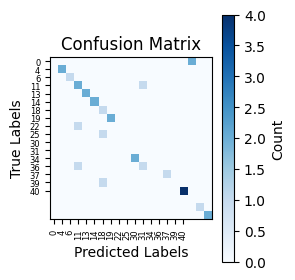

(0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666)

Model: LightGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 257
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 7
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Info] Start training from score -2.995732
[LightGBM] [Info] Start training from score -3.178054
[LightGBM] [Info] Start training from score -2.841582
[LightGBM] [Info] Start training from score -4.787492
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Info] Start training from score -2.484907
[LightGBM] [Info] Start training from score -4.094345
[LightGBM] [Info] Start training from score -3.688879
[LightGBM] [Info] Start training from score -3.401197
[LightGBM] [Info] Start training from score -4.094345
[LightGBM] [Info] Start

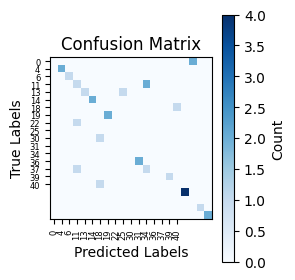

(0.5666666666666667, 0.5666666666666667, 0.5666666666666667, 0.5666666666666667)

--- Evaluation for Chittagonj ---

Model: Decision Tree


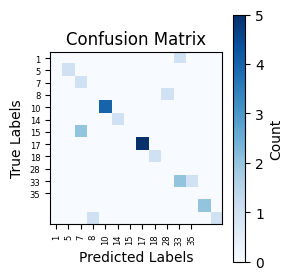

(0.75, 0.75, 0.75, 0.75)

Model: Random Forest


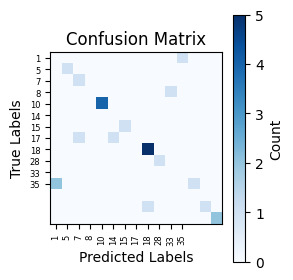

(0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666)

Model: Gradient Boosting


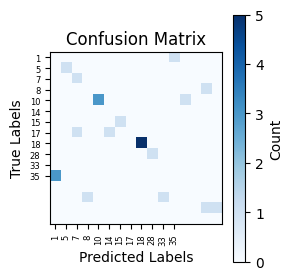

(0.5416666666666666, 0.5416666666666666, 0.5416666666666666, 0.5416666666666666)

Model: HistGradientBoosting


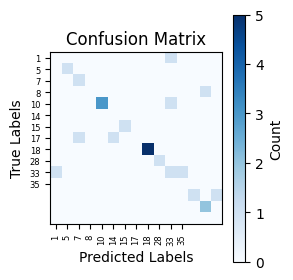

(0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666)

Model: KNN


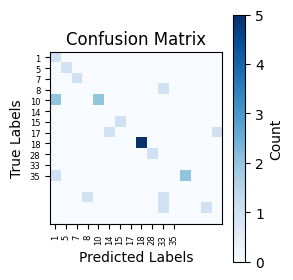

(0.5416666666666666, 0.5416666666666666, 0.5416666666666666, 0.5416666666666666)

Model: CatBoost
Learning rate set to 0.070213
0:	learn: 3.0053328	total: 11.4ms	remaining: 11.4s
1:	learn: 2.9464692	total: 20ms	remaining: 10s
2:	learn: 2.8853113	total: 36.7ms	remaining: 12.2s
3:	learn: 2.8148204	total: 48.3ms	remaining: 12s
4:	learn: 2.7443362	total: 88.9ms	remaining: 17.7s
5:	learn: 2.6781766	total: 111ms	remaining: 18.3s
6:	learn: 2.6146266	total: 123ms	remaining: 17.4s
7:	learn: 2.5650871	total: 131ms	remaining: 16.2s
8:	learn: 2.5175211	total: 135ms	remaining: 14.8s
9:	learn: 2.4646210	total: 143ms	remaining: 14.2s
10:	learn: 2.4152221	total: 155ms	remaining: 13.9s
11:	learn: 2.3697844	total: 166ms	remaining: 13.7s
12:	learn: 2.3320850	total: 175ms	remaining: 13.3s
13:	learn: 2.2929341	total: 188ms	remaining: 13.2s
14:	learn: 2.2516571	total: 197ms	remaining: 12.9s
15:	learn: 2.1999613	total: 208ms	remaining: 12.8s
16:	learn: 2.1553928	total: 211ms	remaining: 12.2s
17:	learn: 2.114

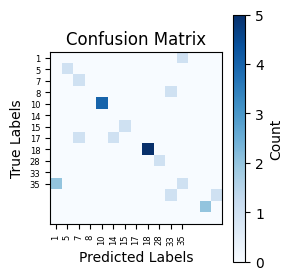

(0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666)

Model: LightGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 96, number of used features: 7
[LightGBM] [Info] Start training from score -2.954910
[LightGBM] [Info] Start training from score -2.954910
[LightGBM] [Info] Start training from score -3.465736
[LightGBM] [Info] Start training from score -3.465736
[LightGBM] [Info] Start training from score -3.178054
[LightGBM] [Info] Start training from score -3.871201
[LightGBM] [Info] Start training from score -3.178054
[LightGBM] [Info] Start training from score -3.871201
[LightGBM] [Info] Start training from score -3.178054
[LightGBM] [Info] Start training from score -4.564348
[LightGBM] [Info] Start training from score -2.954910
[LightGBM] [Info] Start 

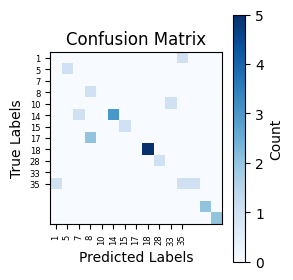

(0.7083333333333334, 0.7083333333333334, 0.7083333333333334, 0.7083333333333334)

--- Evaluation for Cumilla ---

Model: Decision Tree


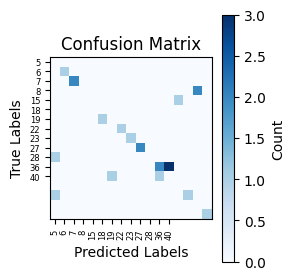

(0.5, 0.5, 0.5, 0.5)

Model: Random Forest


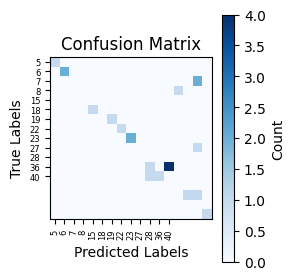

(0.4090909090909091, 0.4090909090909091, 0.4090909090909091, 0.4090909090909091)

Model: Gradient Boosting


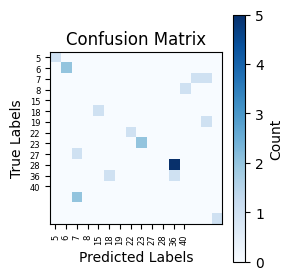

(0.36363636363636365, 0.36363636363636365, 0.36363636363636365, 0.36363636363636365)

Model: HistGradientBoosting


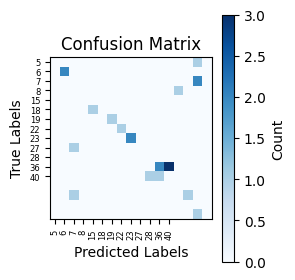

(0.4090909090909091, 0.4090909090909091, 0.4090909090909091, 0.4090909090909091)

Model: KNN


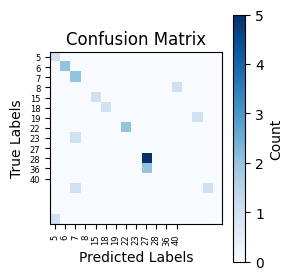

(0.4090909090909091, 0.4090909090909091, 0.4090909090909091, 0.4090909090909091)

Model: CatBoost
Learning rate set to 0.06982
0:	learn: 3.0263585	total: 7.21ms	remaining: 7.21s
1:	learn: 2.9662650	total: 17.9ms	remaining: 8.96s
2:	learn: 2.8981355	total: 31ms	remaining: 10.3s
3:	learn: 2.8442919	total: 40.2ms	remaining: 10s
4:	learn: 2.7854942	total: 53.3ms	remaining: 10.6s
5:	learn: 2.7342167	total: 63.3ms	remaining: 10.5s
6:	learn: 2.6785339	total: 86.4ms	remaining: 12.3s
7:	learn: 2.6220855	total: 96ms	remaining: 11.9s
8:	learn: 2.5789129	total: 106ms	remaining: 11.7s
9:	learn: 2.5290243	total: 120ms	remaining: 11.9s
10:	learn: 2.4870826	total: 135ms	remaining: 12.1s
11:	learn: 2.4452950	total: 147ms	remaining: 12.1s
12:	learn: 2.3981976	total: 158ms	remaining: 12s
13:	learn: 2.3556340	total: 168ms	remaining: 11.8s
14:	learn: 2.3100889	total: 178ms	remaining: 11.7s
15:	learn: 2.2604641	total: 194ms	remaining: 11.9s
16:	learn: 2.2244336	total: 202ms	remaining: 11.7s
17:	learn: 2.189

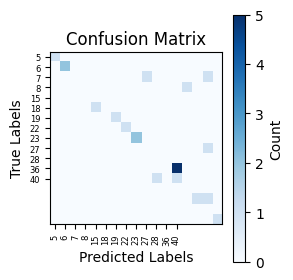

(0.45454545454545453, 0.45454545454545453, 0.45454545454545453, 0.45454545454545453)

Model: LightGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 188
[LightGBM] [Info] Number of data points in the train set: 86, number of used features: 7
[LightGBM] [Info] Start training from score -2.844909
[LightGBM] [Info] Start training from score -3.068053
[LightGBM] [Info] Start training from score -3.355735
[LightGBM] [Info] Start training from score -2.508437
[LightGBM] [Info] Start training from score -2.508437
[LightGBM] [Info] Start training from score -3.355735
[LightGBM] [Info] Start training from score -3.761200
[LightGBM] [Info] Start training from score -3.355735
[LightGBM] [Info] Start training from score -3.355735
[LightGBM] [Info] Start training from score -2.844909
[LightGBM] [Info] Start training from score -3.355735
[LightGBM] [Info] St

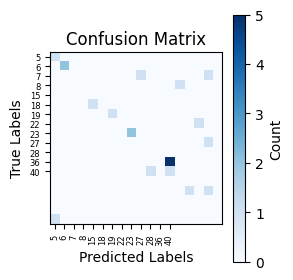

(0.36363636363636365, 0.36363636363636365, 0.36363636363636365, 0.36363636363636365)

--- Evaluation for Dhaka ---

Model: Decision Tree


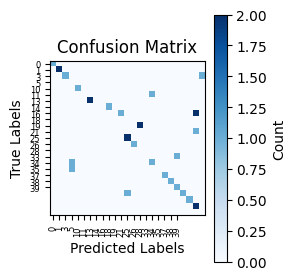

(0.5806451612903226, 0.5806451612903226, 0.5806451612903226, 0.5806451612903226)

Model: Random Forest


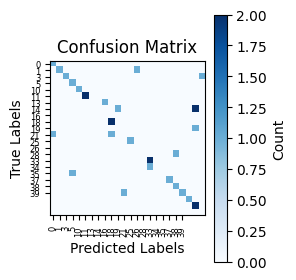

(0.5806451612903226, 0.5806451612903226, 0.5806451612903226, 0.5806451612903226)

Model: Gradient Boosting


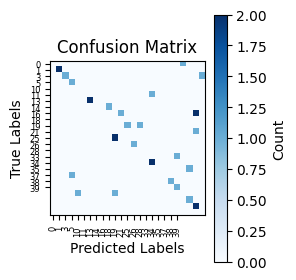

(0.45161290322580644, 0.45161290322580644, 0.45161290322580644, 0.45161290322580644)

Model: HistGradientBoosting


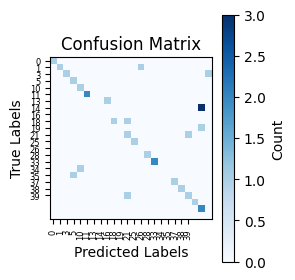

(0.6129032258064516, 0.6129032258064516, 0.6129032258064516, 0.6129032258064516)

Model: KNN


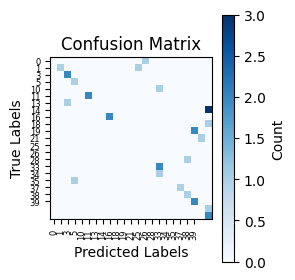

(0.5161290322580645, 0.5161290322580645, 0.5161290322580645, 0.5161290322580645)

Model: CatBoost
Learning rate set to 0.071136
0:	learn: 3.2805267	total: 22.2ms	remaining: 22.2s
1:	learn: 3.1958434	total: 40.4ms	remaining: 20.1s
2:	learn: 3.1257283	total: 66.8ms	remaining: 22.2s
3:	learn: 3.0473134	total: 94.3ms	remaining: 23.5s
4:	learn: 2.9558978	total: 114ms	remaining: 22.6s
5:	learn: 2.8809113	total: 134ms	remaining: 22.3s
6:	learn: 2.8072004	total: 151ms	remaining: 21.4s
7:	learn: 2.7366432	total: 166ms	remaining: 20.5s
8:	learn: 2.6781176	total: 181ms	remaining: 19.9s
9:	learn: 2.6156234	total: 196ms	remaining: 19.4s
10:	learn: 2.5578116	total: 212ms	remaining: 19s
11:	learn: 2.4986065	total: 228ms	remaining: 18.8s
12:	learn: 2.4451669	total: 246ms	remaining: 18.7s
13:	learn: 2.3958468	total: 269ms	remaining: 19s
14:	learn: 2.3352271	total: 286ms	remaining: 18.8s
15:	learn: 2.2805566	total: 302ms	remaining: 18.6s
16:	learn: 2.2264886	total: 318ms	remaining: 18.4s
17:	learn: 2.17

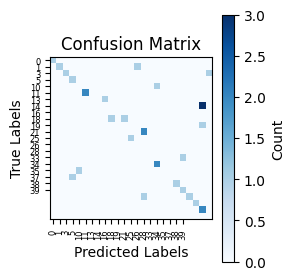

(0.5161290322580645, 0.5161290322580645, 0.5161290322580645, 0.5161290322580645)

Model: LightGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000030 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 268
[LightGBM] [Info] Number of data points in the train set: 124, number of used features: 7
[LightGBM] [Info] Start training from score -4.127134
[LightGBM] [Info] Start training from score -3.433987
[LightGBM] [Info] Start training from score -3.028522
[LightGBM] [Info] Start training from score -4.820282
[LightGBM] [Info] Start training from score -3.721669
[LightGBM] [Info] Start training from score -3.721669
[LightGBM] [Info] Start training from score -2.874371
[LightGBM] [Info] Start training from score -3.721669
[LightGBM] [Info] Start training from score -3.433987
[LightGBM] [Info] Start training from score -2.517696
[LightGBM] [Info] Start training from score -3.721669
[LightGBM] [Info] Start

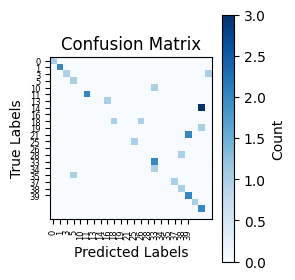

(0.5806451612903226, 0.5806451612903226, 0.5806451612903226, 0.5806451612903226)

--- Evaluation for Dinajpur ---

Model: Decision Tree


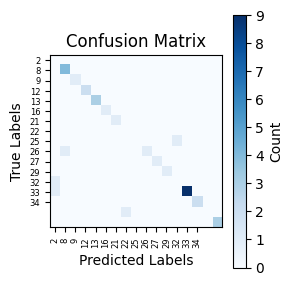

(0.8529411764705882, 0.8529411764705882, 0.8529411764705882, 0.8529411764705882)

Model: Random Forest


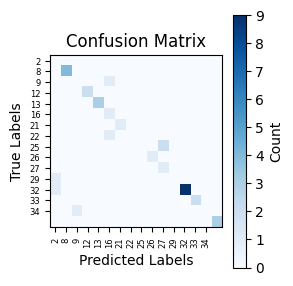

(0.7941176470588235, 0.7941176470588235, 0.7941176470588235, 0.7941176470588235)

Model: Gradient Boosting


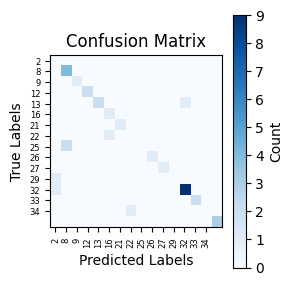

(0.7941176470588235, 0.7941176470588235, 0.7941176470588235, 0.7941176470588235)

Model: HistGradientBoosting


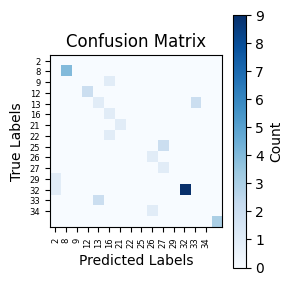

(0.6764705882352942, 0.6764705882352942, 0.6764705882352942, 0.6764705882352942)

Model: KNN


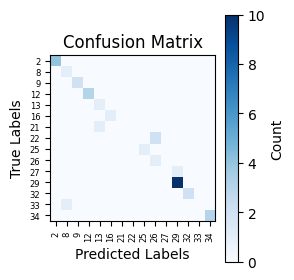

(0.8529411764705882, 0.8529411764705882, 0.8529411764705882, 0.8529411764705882)

Model: CatBoost
Learning rate set to 0.071445
0:	learn: 2.9354905	total: 13.7ms	remaining: 13.7s
1:	learn: 2.7772308	total: 30ms	remaining: 15s
2:	learn: 2.6158539	total: 43.8ms	remaining: 14.6s
3:	learn: 2.5127185	total: 59.2ms	remaining: 14.7s
4:	learn: 2.3968900	total: 81.5ms	remaining: 16.2s
5:	learn: 2.2997015	total: 95.2ms	remaining: 15.8s
6:	learn: 2.1851551	total: 110ms	remaining: 15.5s
7:	learn: 2.1142201	total: 127ms	remaining: 15.7s
8:	learn: 2.0382566	total: 139ms	remaining: 15.3s
9:	learn: 1.9682332	total: 152ms	remaining: 15.1s
10:	learn: 1.9041156	total: 166ms	remaining: 14.9s
11:	learn: 1.8458332	total: 177ms	remaining: 14.6s
12:	learn: 1.7906731	total: 189ms	remaining: 14.3s
13:	learn: 1.7318276	total: 201ms	remaining: 14.1s
14:	learn: 1.6766441	total: 214ms	remaining: 14.1s
15:	learn: 1.6217012	total: 233ms	remaining: 14.3s
16:	learn: 1.5679378	total: 248ms	remaining: 14.4s
17:	learn: 1.

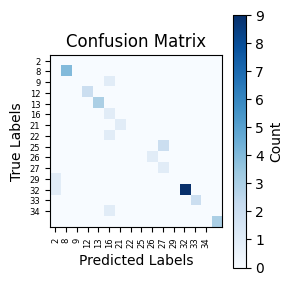

(0.7941176470588235, 0.7941176470588235, 0.7941176470588235, 0.7941176470588235)

Model: LightGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 289
[LightGBM] [Info] Number of data points in the train set: 135, number of used features: 7
[LightGBM] [Info] Start training from score -4.905275
[LightGBM] [Info] Start training from score -2.959365
[LightGBM] [Info] Start training from score -2.825833
[LightGBM] [Info] Start training from score -3.518980
[LightGBM] [Info] Start training from score -3.295837
[LightGBM] [Info] Start training from score -3.113515
[LightGBM] [Info] Start training from score -3.518980
[LightGBM] [Info] Start training from score -3.518980
[LightGBM] [Info] Start training from score -3.295837
[LightGBM] [Info] Start training from score -3.295837
[LightGBM] [Info] Start training from score -3.806662
[LightGBM] [Info] Start

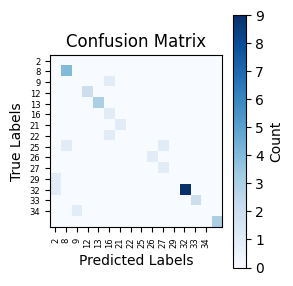

(0.7941176470588235, 0.7941176470588235, 0.7941176470588235, 0.7941176470588235)

--- Evaluation for Faridpur ---

Model: Decision Tree


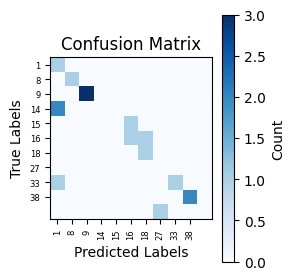

(0.625, 0.625, 0.625, 0.625)

Model: Random Forest


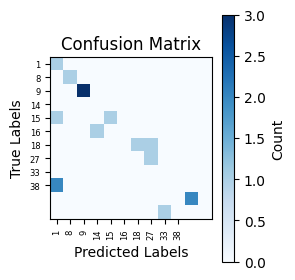

(0.625, 0.625, 0.625, 0.625)

Model: Gradient Boosting


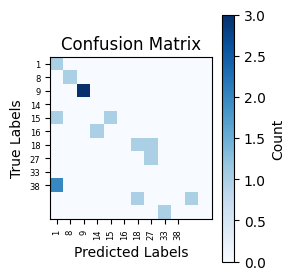

(0.5625, 0.5625, 0.5625, 0.5625)

Model: HistGradientBoosting


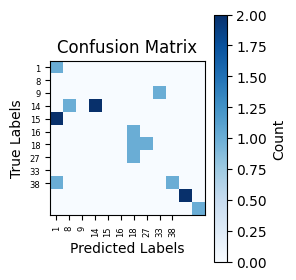

(0.5, 0.5, 0.5, 0.5)

Model: KNN


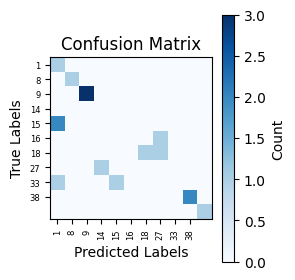

(0.5625, 0.5625, 0.5625, 0.5625)

Model: CatBoost
Learning rate set to 0.068608
0:	learn: 2.7779198	total: 5.16ms	remaining: 5.16s
1:	learn: 2.7324236	total: 9.78ms	remaining: 4.88s
2:	learn: 2.6808463	total: 14.8ms	remaining: 4.93s
3:	learn: 2.6489716	total: 21.6ms	remaining: 5.39s
4:	learn: 2.6038919	total: 24ms	remaining: 4.78s
5:	learn: 2.5677206	total: 28.1ms	remaining: 4.65s
6:	learn: 2.5268038	total: 32.3ms	remaining: 4.59s
7:	learn: 2.4825718	total: 37.1ms	remaining: 4.59s
8:	learn: 2.4480136	total: 40.9ms	remaining: 4.5s
9:	learn: 2.4174084	total: 43ms	remaining: 4.25s
10:	learn: 2.3841564	total: 47.1ms	remaining: 4.23s
11:	learn: 2.3503695	total: 51.9ms	remaining: 4.27s
12:	learn: 2.2989750	total: 58.3ms	remaining: 4.42s
13:	learn: 2.2593740	total: 61.8ms	remaining: 4.35s
14:	learn: 2.2082687	total: 66.5ms	remaining: 4.37s
15:	learn: 2.1803738	total: 67.6ms	remaining: 4.16s
16:	learn: 2.1434225	total: 71.6ms	remaining: 4.14s
17:	learn: 2.1113066	total: 76.8ms	remaining: 4.19s

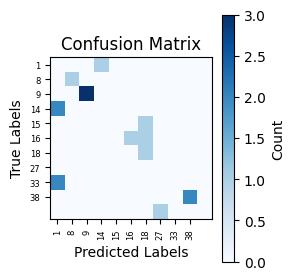

(0.5, 0.5, 0.5, 0.5)

Model: LightGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000019 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 135
[LightGBM] [Info] Number of data points in the train set: 61, number of used features: 7
[LightGBM] [Info] Start training from score -2.724580
[LightGBM] [Info] Start training from score -2.501436
[LightGBM] [Info] Start training from score -2.501436
[LightGBM] [Info] Start training from score -3.417727
[LightGBM] [Info] Start training from score -3.012262
[LightGBM] [Info] Start training from score -2.724580
[LightGBM] [Info] Start training from score -2.724580
[LightGBM] [Info] Start training from score -2.164964
[LightGBM] [Info] Start training from score -4.110874
[LightGBM] [Info] Start training from score -2.724580
[LightGBM] [Info] Start training from score -2.501436
[LightGBM] [Info] Start training from score -3.012262
[LightGBM] [Info] Start traini

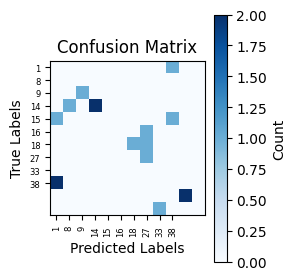

(0.4375, 0.4375, 0.4375, 0.4375)

--- Evaluation for Khulna ---

Model: Decision Tree


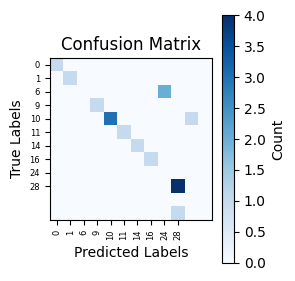

(0.7647058823529411, 0.7647058823529411, 0.7647058823529411, 0.7647058823529411)

Model: Random Forest


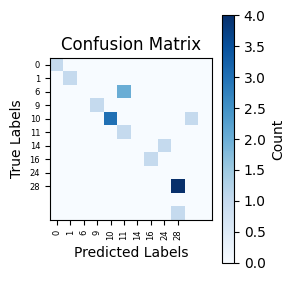

(0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765)

Model: Gradient Boosting


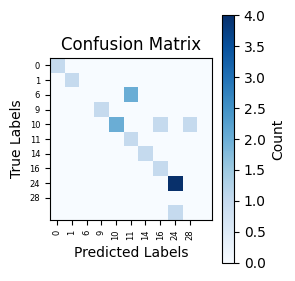

(0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765)

Model: HistGradientBoosting


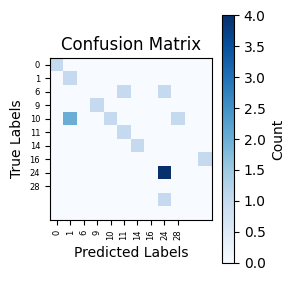

(0.5882352941176471, 0.5882352941176471, 0.5882352941176471, 0.5882352941176471)

Model: KNN


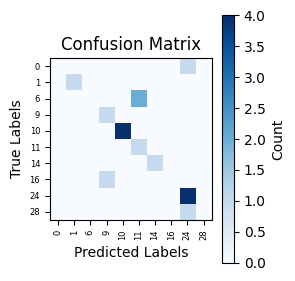

(0.7058823529411765, 0.7058823529411765, 0.7058823529411765, 0.7058823529411765)

Model: CatBoost
Learning rate set to 0.068776
0:	learn: 2.8928344	total: 5.02ms	remaining: 5.01s
1:	learn: 2.8369729	total: 9.45ms	remaining: 4.72s
2:	learn: 2.7812050	total: 14.9ms	remaining: 4.96s
3:	learn: 2.7319139	total: 19.7ms	remaining: 4.91s
4:	learn: 2.6822033	total: 26.1ms	remaining: 5.19s
5:	learn: 2.6387431	total: 33.8ms	remaining: 5.61s
6:	learn: 2.5809775	total: 39.3ms	remaining: 5.57s
7:	learn: 2.5361767	total: 43.8ms	remaining: 5.43s
8:	learn: 2.4976585	total: 49.3ms	remaining: 5.43s
9:	learn: 2.4605445	total: 56.4ms	remaining: 5.58s
10:	learn: 2.4126578	total: 61.8ms	remaining: 5.55s
11:	learn: 2.3616929	total: 66.2ms	remaining: 5.45s
12:	learn: 2.3229553	total: 74.9ms	remaining: 5.69s
13:	learn: 2.2861226	total: 80.9ms	remaining: 5.69s
14:	learn: 2.2452377	total: 91ms	remaining: 5.98s
15:	learn: 2.2061422	total: 99.5ms	remaining: 6.12s
16:	learn: 2.1739960	total: 105ms	remaining: 6.07s
1

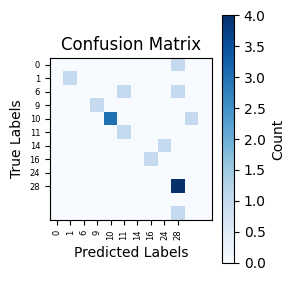

(0.6470588235294118, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118)

Model: LightGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000019 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 145
[LightGBM] [Info] Number of data points in the train set: 64, number of used features: 7
[LightGBM] [Info] Start training from score -4.158883
[LightGBM] [Info] Start training from score -3.465736
[LightGBM] [Info] Start training from score -3.060271
[LightGBM] [Info] Start training from score -3.465736
[LightGBM] [Info] Start training from score -2.772589
[LightGBM] [Info] Start training from score -3.060271
[LightGBM] [Info] Start training from score -2.549445
[LightGBM] [Info] Start training from score -4.158883
[LightGBM] [Info] Start training from score -2.212973
[LightGBM] [Info] Start training from score -4.158883
[LightGBM] [Info] Start training from score -3.465736
[LightGBM] [Info] Start 

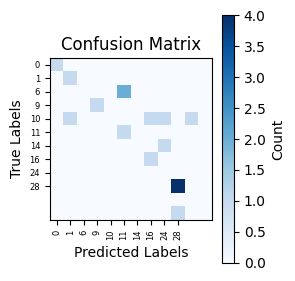

(0.5294117647058824, 0.5294117647058824, 0.5294117647058824, 0.5294117647058824)

--- Evaluation for Jashore ---

Model: Decision Tree


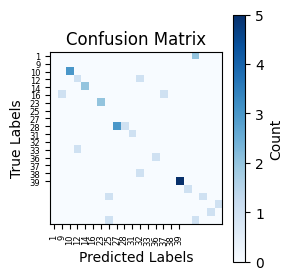

(0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454)

Model: Random Forest


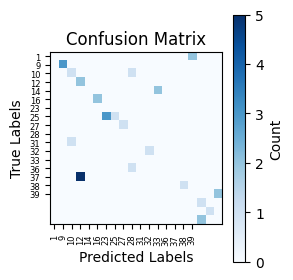

(0.42424242424242425, 0.42424242424242425, 0.42424242424242425, 0.42424242424242425)

Model: Gradient Boosting


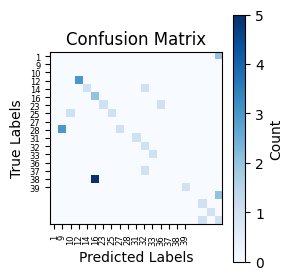

(0.45454545454545453, 0.45454545454545453, 0.45454545454545453, 0.45454545454545453)

Model: HistGradientBoosting


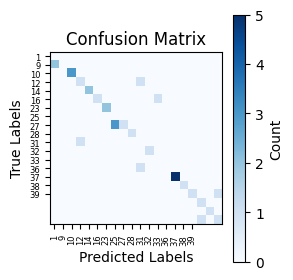

(0.6666666666666666, 0.6666666666666666, 0.6666666666666666, 0.6666666666666666)

Model: KNN


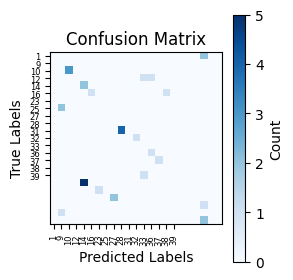

(0.30303030303030304, 0.30303030303030304, 0.30303030303030304, 0.30303030303030304)

Model: CatBoost
Learning rate set to 0.071307
0:	learn: 3.3509874	total: 21.3ms	remaining: 21.3s
1:	learn: 3.2774993	total: 40.4ms	remaining: 20.1s
2:	learn: 3.2145903	total: 60.2ms	remaining: 20s
3:	learn: 3.1511471	total: 84.4ms	remaining: 21s
4:	learn: 3.0804467	total: 101ms	remaining: 20.1s
5:	learn: 3.0162625	total: 118ms	remaining: 19.5s
6:	learn: 2.9486505	total: 135ms	remaining: 19.1s
7:	learn: 2.8880986	total: 152ms	remaining: 18.8s
8:	learn: 2.8315133	total: 169ms	remaining: 18.6s
9:	learn: 2.7722377	total: 186ms	remaining: 18.4s
10:	learn: 2.7174292	total: 204ms	remaining: 18.4s
11:	learn: 2.6715655	total: 221ms	remaining: 18.2s
12:	learn: 2.6189828	total: 247ms	remaining: 18.8s
13:	learn: 2.5686076	total: 317ms	remaining: 22.3s
14:	learn: 2.5189746	total: 347ms	remaining: 22.8s
15:	learn: 2.4674929	total: 364ms	remaining: 22.4s
16:	learn: 2.4271133	total: 381ms	remaining: 22.1s
17:	learn: 

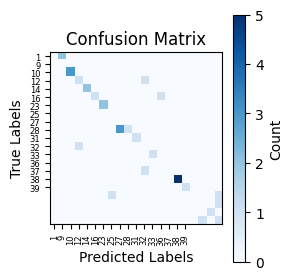

(0.6060606060606061, 0.6060606060606061, 0.6060606060606061, 0.6060606060606061)

Model: LightGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000031 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 275
[LightGBM] [Info] Number of data points in the train set: 130, number of used features: 7
[LightGBM] [Info] Start training from score -4.867534
[LightGBM] [Info] Start training from score -2.921624
[LightGBM] [Info] Start training from score -3.258097
[LightGBM] [Info] Start training from score -3.481240
[LightGBM] [Info] Start training from score -3.768922
[LightGBM] [Info] Start training from score -4.867534
[LightGBM] [Info] Start training from score -2.921624
[LightGBM] [Info] Start training from score -2.788093
[LightGBM] [Info] Start training from score -3.768922
[LightGBM] [Info] Start training from score -3.481240
[LightGBM] [Info] Start training from score -3.258097
[LightGBM] [Info] Start

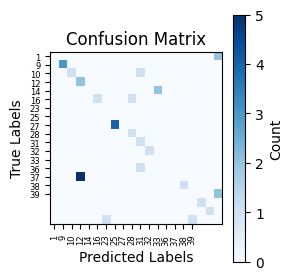

(0.3939393939393939, 0.3939393939393939, 0.3939393939393939, 0.3939393939393939)

--- Evaluation for Mymensingh ---

Model: Decision Tree


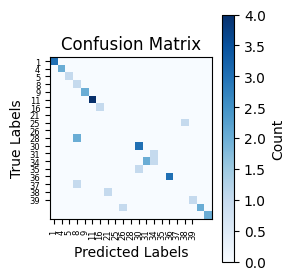

(0.7222222222222222, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222)

Model: Random Forest


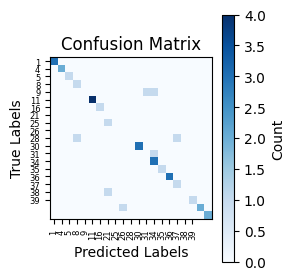

(0.7777777777777778, 0.7777777777777778, 0.7777777777777778, 0.7777777777777778)

Model: Gradient Boosting


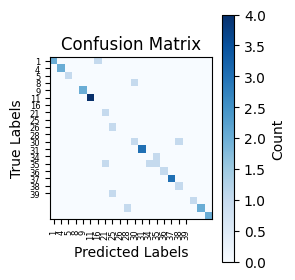

(0.75, 0.75, 0.75, 0.75)

Model: HistGradientBoosting


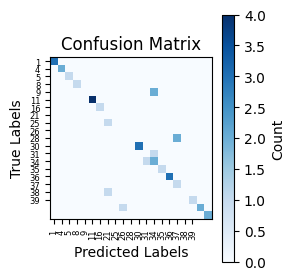

(0.75, 0.75, 0.75, 0.75)

Model: KNN


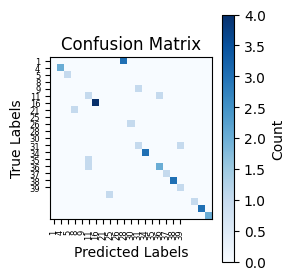

(0.6944444444444444, 0.6944444444444444, 0.6944444444444444, 0.6944444444444444)

Model: CatBoost
Learning rate set to 0.071603
0:	learn: 3.2847651	total: 25.1ms	remaining: 25.1s
1:	learn: 3.2064221	total: 45.8ms	remaining: 22.9s
2:	learn: 3.1231398	total: 69.7ms	remaining: 23.2s
3:	learn: 3.0442048	total: 90.2ms	remaining: 22.5s
4:	learn: 2.9720300	total: 109ms	remaining: 21.7s
5:	learn: 2.9048030	total: 129ms	remaining: 21.5s
6:	learn: 2.8322946	total: 152ms	remaining: 21.5s
7:	learn: 2.7646904	total: 174ms	remaining: 21.5s
8:	learn: 2.7007120	total: 198ms	remaining: 21.8s
9:	learn: 2.6390397	total: 220ms	remaining: 21.8s
10:	learn: 2.5891465	total: 246ms	remaining: 22.1s
11:	learn: 2.5346714	total: 271ms	remaining: 22.3s
12:	learn: 2.4736120	total: 341ms	remaining: 25.9s
13:	learn: 2.4198088	total: 381ms	remaining: 26.8s
14:	learn: 2.3666583	total: 413ms	remaining: 27.1s
15:	learn: 2.3076904	total: 433ms	remaining: 26.6s
16:	learn: 2.2625670	total: 454ms	remaining: 26.3s
17:	learn: 

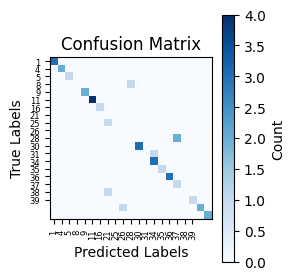

(0.8055555555555556, 0.8055555555555556, 0.8055555555555556, 0.8055555555555556)

Model: LightGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 300
[LightGBM] [Info] Number of data points in the train set: 141, number of used features: 7
[LightGBM] [Info] Start training from score -4.255613
[LightGBM] [Info] Start training from score -2.751535
[LightGBM] [Info] Start training from score -3.562466
[LightGBM] [Info] Start training from score -3.562466
[LightGBM] [Info] Start training from score -3.157000
[LightGBM] [Info] Start training from score -3.850148
[LightGBM] [Info] Start training from score -4.255613
[LightGBM] [Info] Start training from score -3.339322
[LightGBM] [Info] Start training from score -3.157000
[LightGBM] [Info] Start training from score -3.562466
[LightGBM] [Info] Start training from score -3.002850
[LightGBM] [Info] Start

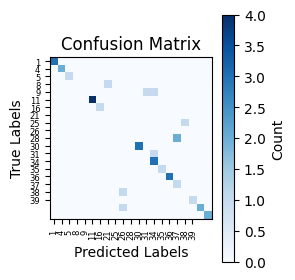

(0.75, 0.75, 0.75, 0.75)

--- Evaluation for Rajshahi ---

Model: Decision Tree


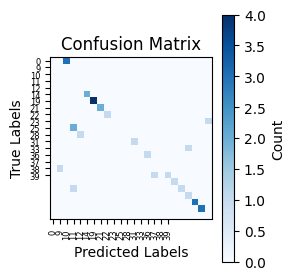

(0.65625, 0.65625, 0.65625, 0.65625)

Model: Random Forest


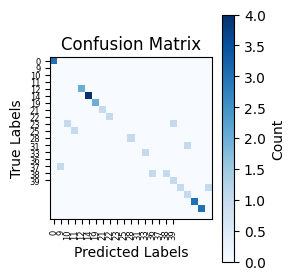

(0.78125, 0.78125, 0.78125, 0.78125)

Model: Gradient Boosting


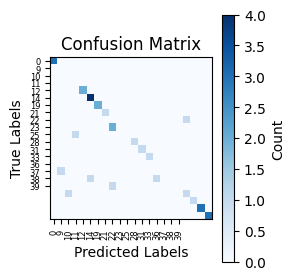

(0.71875, 0.71875, 0.71875, 0.71875)

Model: HistGradientBoosting


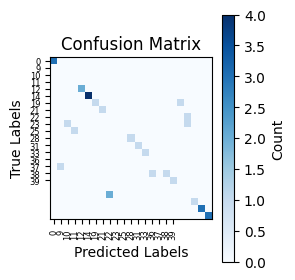

(0.71875, 0.71875, 0.71875, 0.71875)

Model: KNN


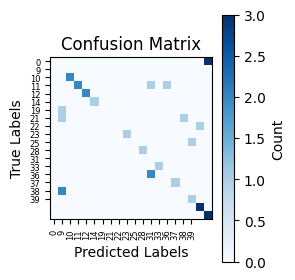

(0.5625, 0.5625, 0.5625, 0.5625)

Model: CatBoost
Learning rate set to 0.071223
0:	learn: 3.3589826	total: 23.8ms	remaining: 23.8s
1:	learn: 3.2881896	total: 55.8ms	remaining: 27.8s
2:	learn: 3.2132787	total: 87.4ms	remaining: 29s
3:	learn: 3.1484897	total: 108ms	remaining: 26.9s
4:	learn: 3.0626681	total: 130ms	remaining: 25.8s
5:	learn: 2.9972793	total: 146ms	remaining: 24.2s
6:	learn: 2.9305438	total: 162ms	remaining: 23s
7:	learn: 2.8578200	total: 178ms	remaining: 22s
8:	learn: 2.8009031	total: 195ms	remaining: 21.5s
9:	learn: 2.7311619	total: 213ms	remaining: 21.1s
10:	learn: 2.6705977	total: 235ms	remaining: 21.1s
11:	learn: 2.6101869	total: 255ms	remaining: 21s
12:	learn: 2.5645373	total: 279ms	remaining: 21.2s
13:	learn: 2.5174598	total: 296ms	remaining: 20.9s
14:	learn: 2.4525627	total: 315ms	remaining: 20.7s
15:	learn: 2.3994520	total: 332ms	remaining: 20.4s
16:	learn: 2.3590436	total: 350ms	remaining: 20.2s
17:	learn: 2.3023856	total: 368ms	remaining: 20.1s
18:	learn: 2.2536

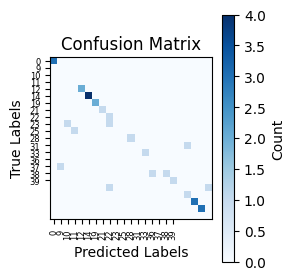

(0.75, 0.75, 0.75, 0.75)

Model: LightGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 269
[LightGBM] [Info] Number of data points in the train set: 127, number of used features: 7
[LightGBM] [Info] Start training from score -4.844187
[LightGBM] [Info] Start training from score -4.844187
[LightGBM] [Info] Start training from score -3.457893
[LightGBM] [Info] Start training from score -4.151040
[LightGBM] [Info] Start training from score -3.234749
[LightGBM] [Info] Start training from score -2.898277
[LightGBM] [Info] Start training from score -3.052428
[LightGBM] [Info] Start training from score -2.764746
[LightGBM] [Info] Start training from score -2.764746
[LightGBM] [Info] Start training from score -3.745575
[LightGBM] [Info] Start training from score -4.151040
[LightGBM] [Info] Start training from score -3.457893
[LightGBM] [Info] Start t

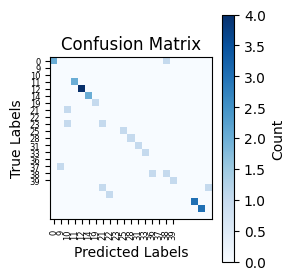

(0.71875, 0.71875, 0.71875, 0.71875)

--- Evaluation for Rangamati ---

Model: Decision Tree


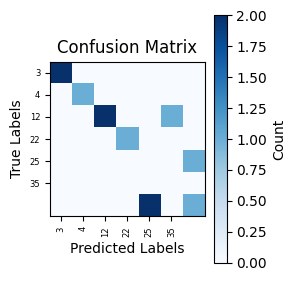

(0.6363636363636364, 0.6363636363636364, 0.6363636363636364, 0.6363636363636364)

Model: Random Forest


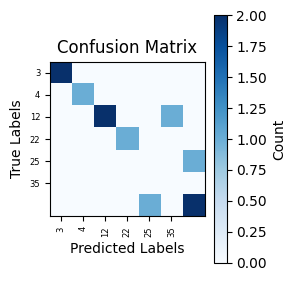

(0.7272727272727273, 0.7272727272727273, 0.7272727272727273, 0.7272727272727273)

Model: Gradient Boosting


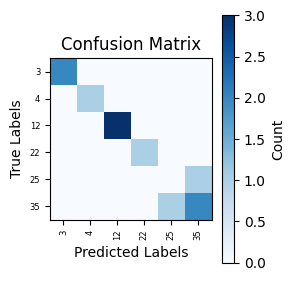

(0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182)

Model: HistGradientBoosting


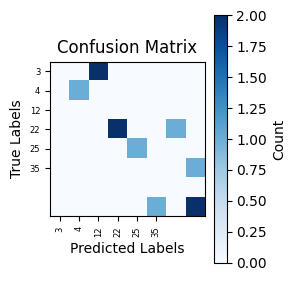

(0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454)

Model: KNN


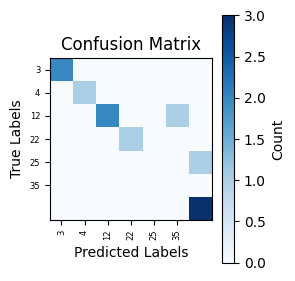

(0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182)

Model: CatBoost
Learning rate set to 0.067474
0:	learn: 2.3447313	total: 2.7ms	remaining: 2.7s
1:	learn: 2.2930463	total: 4.96ms	remaining: 2.47s
2:	learn: 2.2369378	total: 8.07ms	remaining: 2.68s
3:	learn: 2.1853721	total: 11.1ms	remaining: 2.76s
4:	learn: 2.1364617	total: 14.4ms	remaining: 2.87s
5:	learn: 2.0949639	total: 17.8ms	remaining: 2.94s
6:	learn: 2.0366889	total: 21ms	remaining: 2.98s
7:	learn: 1.9949615	total: 22.4ms	remaining: 2.78s
8:	learn: 1.9559172	total: 26.1ms	remaining: 2.88s
9:	learn: 1.9167983	total: 33.7ms	remaining: 3.34s
10:	learn: 1.8750159	total: 131ms	remaining: 11.8s
11:	learn: 1.8427843	total: 135ms	remaining: 11.2s
12:	learn: 1.7995232	total: 138ms	remaining: 10.5s
13:	learn: 1.7689412	total: 141ms	remaining: 9.9s
14:	learn: 1.7259715	total: 144ms	remaining: 9.43s
15:	learn: 1.6866125	total: 146ms	remaining: 9s
16:	learn: 1.6504138	total: 149ms	remaining: 8.61s
17:	learn: 1.

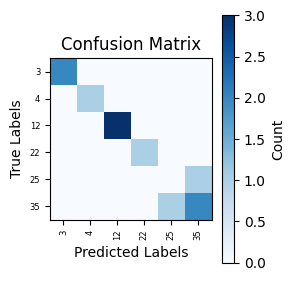

(0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182)

Model: LightGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000018 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 104
[LightGBM] [Info] Number of data points in the train set: 44, number of used features: 7
[LightGBM] [Info] Start training from score -2.685577
[LightGBM] [Info] Start training from score -1.992430
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -2.174752
[LightGBM] [Info] Start training from score -1.992430
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -1.992430
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -2.397895
[LightGBM] [Info] Start training from score -1.992430
[LightGBM] [Warning] No 

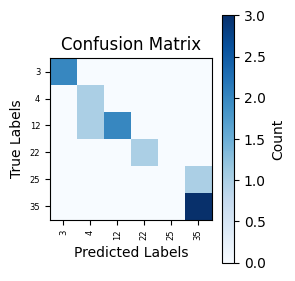

(0.8181818181818182, 0.8181818181818182, 0.8181818181818182, 0.8181818181818182)

--- Evaluation for Sylhet ---

Model: Decision Tree


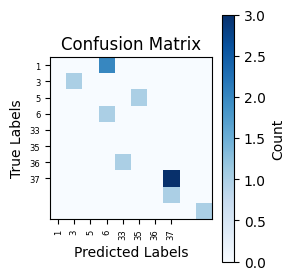

(0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454)

Model: Random Forest


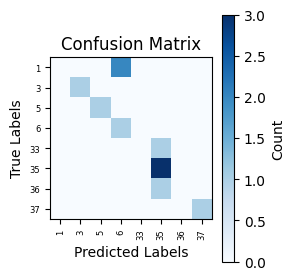

(0.6363636363636364, 0.6363636363636364, 0.6363636363636364, 0.6363636363636364)

Model: Gradient Boosting


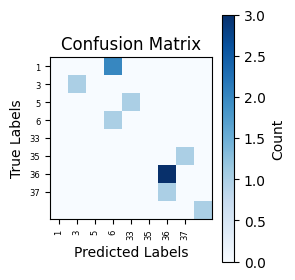

(0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454)

Model: HistGradientBoosting


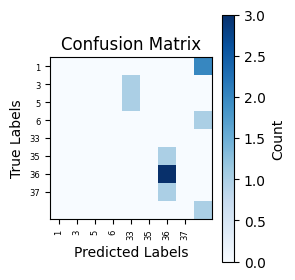

(0.36363636363636365, 0.36363636363636365, 0.36363636363636365, 0.36363636363636365)

Model: KNN


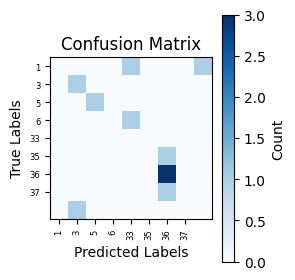

(0.45454545454545453, 0.45454545454545453, 0.45454545454545453, 0.45454545454545453)

Model: CatBoost
Learning rate set to 0.067395
0:	learn: 2.5057533	total: 3.21ms	remaining: 3.21s
1:	learn: 2.4447860	total: 7.38ms	remaining: 3.69s
2:	learn: 2.3792562	total: 10.7ms	remaining: 3.56s
3:	learn: 2.3369261	total: 13.3ms	remaining: 3.31s
4:	learn: 2.2852756	total: 16.2ms	remaining: 3.23s
5:	learn: 2.2323883	total: 19.5ms	remaining: 3.23s
6:	learn: 2.1774335	total: 20.5ms	remaining: 2.91s
7:	learn: 2.1438822	total: 24.4ms	remaining: 3.02s
8:	learn: 2.1045203	total: 29.9ms	remaining: 3.29s
9:	learn: 2.0687324	total: 37ms	remaining: 3.67s
10:	learn: 2.0448249	total: 44.6ms	remaining: 4.01s
11:	learn: 2.0012160	total: 78ms	remaining: 6.42s
12:	learn: 1.9646840	total: 117ms	remaining: 8.9s
13:	learn: 1.9457338	total: 122ms	remaining: 8.59s
14:	learn: 1.9041902	total: 126ms	remaining: 8.28s
15:	learn: 1.8679656	total: 131ms	remaining: 8.07s
16:	learn: 1.8321056	total: 136ms	remaining: 7.87s
17:	

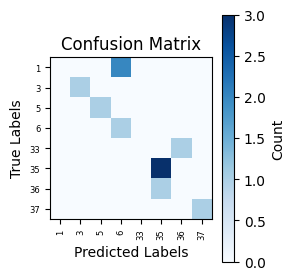

(0.6363636363636364, 0.6363636363636364, 0.6363636363636364, 0.6363636363636364)

Model: LightGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000028 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 98
[LightGBM] [Info] Number of data points in the train set: 43, number of used features: 7
[LightGBM] [Info] Start training from score -2.374906
[LightGBM] [Info] Start training from score -3.761200
[LightGBM] [Info] Start training from score -3.761200
[LightGBM] [Info] Start training from score -2.374906
[LightGBM] [Info] Start training from score -3.761200
[LightGBM] [Info] Start training from score -2.374906
[LightGBM] [Info] Start training from score -2.662588
[LightGBM] [Info] Start training from score -3.761200
[LightGBM] [Info] Start training from score -2.374906
[LightGBM] [Info] Start training from score -3.068053
[LightGBM] [Info] Start training from score -1.196251
[LightGBM] [Info] Start t

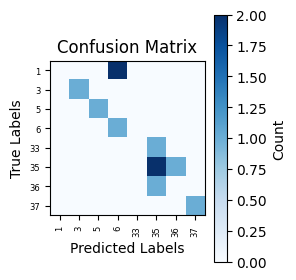

(0.5454545454545454, 0.5454545454545454, 0.5454545454545454, 0.5454545454545454)

--- Evaluation for Rangpur ---

Model: Decision Tree


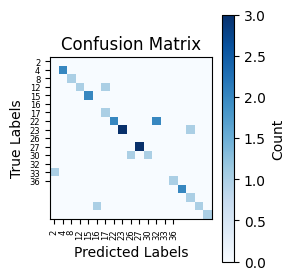

(0.7586206896551724, 0.7586206896551724, 0.7586206896551724, 0.7586206896551724)

Model: Random Forest


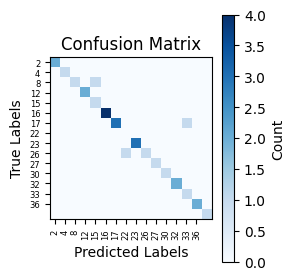

(0.896551724137931, 0.896551724137931, 0.896551724137931, 0.896551724137931)

Model: Gradient Boosting


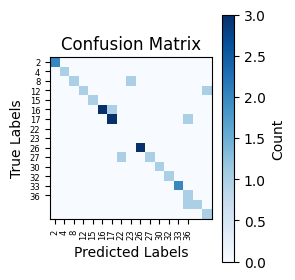

(0.7931034482758621, 0.7931034482758621, 0.7931034482758621, 0.7931034482758621)

Model: HistGradientBoosting


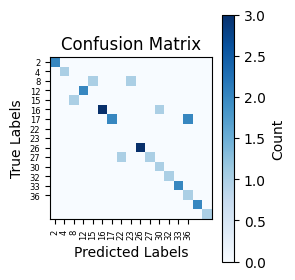

(0.7586206896551724, 0.7586206896551724, 0.7586206896551724, 0.7586206896551724)

Model: KNN


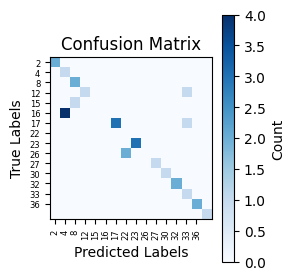

(0.6896551724137931, 0.6896551724137931, 0.6896551724137931, 0.6896551724137931)

Model: CatBoost
Learning rate set to 0.070831
0:	learn: 3.0250429	total: 18.6ms	remaining: 18.6s
1:	learn: 2.9502313	total: 32.1ms	remaining: 16s
2:	learn: 2.8716574	total: 59.8ms	remaining: 19.9s
3:	learn: 2.7753520	total: 76.8ms	remaining: 19.1s
4:	learn: 2.6910629	total: 88.6ms	remaining: 17.6s
5:	learn: 2.6117936	total: 101ms	remaining: 16.7s
6:	learn: 2.5283819	total: 114ms	remaining: 16.1s
7:	learn: 2.4585488	total: 125ms	remaining: 15.5s
8:	learn: 2.3938100	total: 138ms	remaining: 15.2s
9:	learn: 2.3260416	total: 150ms	remaining: 14.8s
10:	learn: 2.2594089	total: 169ms	remaining: 15.2s
11:	learn: 2.1952310	total: 189ms	remaining: 15.6s
12:	learn: 2.1313873	total: 210ms	remaining: 16s
13:	learn: 2.0679879	total: 234ms	remaining: 16.5s
14:	learn: 2.0131369	total: 249ms	remaining: 16.4s
15:	learn: 1.9616617	total: 265ms	remaining: 16.3s
16:	learn: 1.9124857	total: 283ms	remaining: 16.4s
17:	learn: 1.8

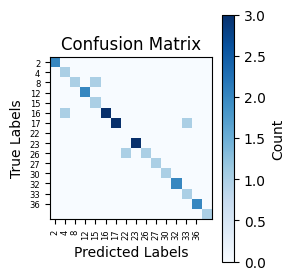

(0.8620689655172413, 0.8620689655172413, 0.8620689655172413, 0.8620689655172413)

Model: LightGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 249
[LightGBM] [Info] Number of data points in the train set: 114, number of used features: 7
[LightGBM] [Info] Start training from score -3.637586
[LightGBM] [Info] Start training from score -2.251292
[LightGBM] [Info] Start training from score -4.043051
[LightGBM] [Info] Start training from score -2.656757
[LightGBM] [Info] Start training from score -3.349904
[LightGBM] [Info] Start training from score -4.043051
[LightGBM] [Info] Start training from score -3.349904
[LightGBM] [Info] Start training from score -3.126761
[LightGBM] [Info] Start training from score -3.637586
[LightGBM] [Info] Start training from score -4.043051
[LightGBM] [Info] Start training from score -1.963610
[LightGBM] [Info] Start

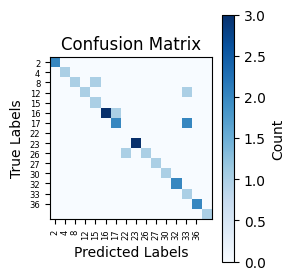

(0.7931034482758621, 0.7931034482758621, 0.7931034482758621, 0.7931034482758621)


In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

for zone_name, df in zone_datasets.items():
    print(f"\n--- Evaluation for {zone_name} ---")

    df.drop(columns=['Agricultural zone'], axis=1, inplace=True)
    X=df.drop('label_encoded', axis=1)
    y = df['label_encoded']

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

    mask = ((X_scaled >= -2) & (X_scaled <= 2)).all(axis=1)
    X_filtered = X_scaled[mask]
    y_filtered = y[mask] 

    X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

    for model_name, model in models.items():
        print(f"\nModel: {model_name}")
        result = evaluate_model(model, X_train, y_train, X_test, y_test)
        print(result)